In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from IPython.display import Image
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.keep100', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.ct0', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')

flags.DEFINE_string('op_name', 'words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')
#flags.DEFINE_string('op_name', 'encoder_words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True)
  #print('text_ids', text_ids)
    
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_emb_score', feed_dict = {'rnn/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  #print(tf.get_collection('debug_seqeuence'))
  #x  =  predictor.inference(['debug_seqeuence'], index=0,
  #                                  feed_dict= {
  #                                    'rnn/main/text:0': [text_ids]
  #                                    })

  #print(x)
  #return
    
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference('text_emb_sim', 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids],
                                      'rnn/main/text2:0': [text2_ids]
                                      #'rnn/main/text2:0':[gezi.pad([1], 50)]
                                      })
    print(score[0], len(score[0]))
    return score[0]

  #seq_len = 50	


  #print('words', words)
  argmax_encode = predictor.inference([FLAGS.op_name], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])
  

  argmax_encode = argmax_encode[0][0]
  #argmax_encode = [max(x, 0) for x in argmax_encode]

  #print('----', len(argmax_encode))

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True, append_start=True, append_end=True)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  #print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
    
  argmaxs = argmax_encode[:seq_len]
  #print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/model.ckpt-86.3-110000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/model.ckpt-86.3-110000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/model.ckpt-86.3-110000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/model.ckpt-86.3-110000


In [6]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [7]:
top_words('高铁')

铁:0.948578 动车:0.530455 高:0.529998 比重:0.474445 铜棒:0.471155 waki:0.466876 宾馆:0.462840 钢轨:0.460702 产能:0.455442 bv:0.452117 磁性:0.450252 钨:0.446867 加热:0.442495 13805194935:0.439850 烟壶:0.437463 想飞:0.435776 友泓:0.434966 卓众:0.431423 麦斯:0.428401 华迪克:0.425092 天赐:0.424690 恒兴:0.424532 住房:0.422168 dse:0.421911 盘扣:0.419868 电视:0.419854 停放:0.417990 博达:0.417440 航宇:0.417067 亨通:0.417007 加药:0.416978 派发:0.416818 协力:0.416473 奥:0.416273 春雨:0.416183 架:0.415230 旋:0.414766 乘务:0.414460 议价:0.414421 探照灯:0.414164 损耗:0.413963 回转:0.413936 雷:0.413637 碳钢:0.413004 huituo:0.412576 瀚宇:0.411986 江浙:0.411342 楼房:0.411244 声光:0.411172 16949:0.411070 微量:0.410928 静鑫通茂:0.410655 拆装:0.410402 精度:0.410191 磁棒:0.409794 小松:0.409677 一说:0.409593 欧可:0.409392 报废:0.409181 电刷:0.409045 艾希顿:0.408145 组件:0.407537 风驰:0.407442 徽派:0.406829 敬老:0.406070 四轮:0.405616 采煤:0.405451 电偶:0.405186 小丸子:0.404964 三角:0.404925 合金:0.404886 搬厂:0.404833 舱:0.404726 钯:0.404632 千山:0.404410 中创:0.404195 锆:0.404167 背压:0.403429 永旺:0.403377 热流:0.402926 厂址:0.402894 roi:0.402468 

In [8]:
top_words('墨镜')

墨镜:1.000000 轻便:0.499580 开车:0.493836 手提:0.489756 pet:0.487212 音质:0.486324 黄皮:0.485801 泼水:0.484673 粉底:0.481775 减肥:0.476657 适配:0.471806 皮尔兹:0.471252 皮靴:0.470600 开关:0.469236 开水:0.469173 钛:0.465995 古风:0.464871 治脱发:0.461887 桶:0.459784 追:0.456582 副:0.456256 衬托:0.455628 卧:0.455442 摔:0.453517 车型:0.453047 送友:0.452509 运动:0.452251 组件:0.450603 卸妆:0.449109 这时候:0.446501 药水:0.446154 西裤:0.445753 便器:0.445321 走路:0.444937 按摩:0.444899 茶叶:0.444434 搭讪:0.443821 哇:0.443314 档次:0.442847 塑形:0.442631 薄膜:0.442535 毫安:0.441848 垃圾:0.441247 护肤:0.439616 充电:0.438729 龙海:0.438430 穿出:0.438389 夏娃:0.437263 台球:0.437109 泡妞:0.436988 将至:0.436251 暴跌:0.436098 狗粮:0.435784 珍惜:0.434967 瞳:0.434801 绝望:0.434584 放量:0.434147 太空:0.433958 色斑:0.432927 器:0.432604 电偶:0.432383 ugg:0.432372 鹤:0.432031 闭门:0.431564 机芯:0.431264 刀锋:0.431115 代步:0.431031 loho:0.430605 绞股蓝:0.430453 康达:0.429813 衣柜:0.429479 余款:0.429433 眼:0.429422 木瓜:0.429226 尤其:0.429176 麦迪:0.428953 打球:0.428548 烟熏:0.427639 数显:0.427216 送亲:0.426741 揭:0.425687 偏光:0.425446 帅:0.425346 众一:0.4250

In [9]:
predict('墨镜', '墨镜')

[ 0.99999988] 1


array([ 0.99999988], dtype=float32)

In [10]:
predict('墨镜', '鼻子')

[ 0.34790775] 1


array([ 0.34790775], dtype=float32)

In [11]:
top_words('美女')

美女:1.000000 裁缝:0.643365 直播:0.555474 主播:0.469002 真人:0.465400 热辣:0.457937 交友:0.446205 打牌:0.442864 开怀:0.442114 当面:0.432405 小丑:0.431744 好听:0.431743 单身:0.430655 激战:0.424283 追逐:0.424090 综艺:0.423251 婚恋:0.422090 勇敢:0.420622 赛鸽:0.417038 占尽:0.412369 求败:0.412208 妻子:0.409271 唱歌:0.409221 娇羞:0.407381 萝:0.405777 校花:0.404723 鬼怪:0.404685 好转:0.403499 睡着:0.401758 秀:0.399924 清纯:0.399561 内向:0.399481 抢注:0.396997 女生:0.396291 约会:0.396112 出轨:0.395337 姐姐:0.393973 拆机:0.392702 yy:0.392667 蹲:0.392524 妹:0.391424 买手:0.391249 1h:0.391095 喵:0.391054 月薪:0.390532 学姐:0.389023 误事:0.388874 横着:0.387595 播:0.387537 枪战:0.387372 结识:0.387215 西甲:0.386597 异性:0.386483 闯过:0.386470 特效:0.386101 兴许:0.386030 倍率:0.385869 天兴:0.385289 假证:0.383660 万人:0.382971 相投:0.382762 富翁:0.382181 收收:0.381145 同名:0.381140 随地:0.381047 聊天:0.380438 相亲:0.380139 强烈:0.379909 应邀:0.379775 空虚:0.378677 录播:0.378212 搭讪:0.378208 学长:0.378175 地网:0.378077 那些:0.377714 韩剧:0.377635 科班:0.377442 演示:0.377424 东门:0.377389 误删:0.377296 拿出:0.377063 家财:0.376687 说服:0.376522 耕地:0.37632

iPhone隐藏功能：高铁也能在线选座了！


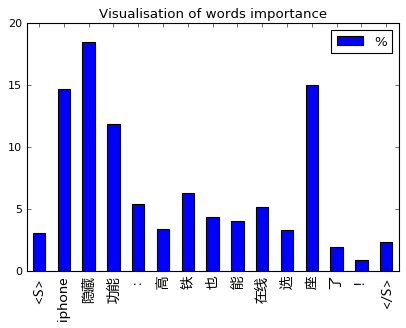

In [12]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [13]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.54861897] 1


array([ 0.54861897], dtype=float32)

In [14]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.49585] 1


array([ 0.49585], dtype=float32)

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.67811322] 1


array([ 0.67811322], dtype=float32)

往返飞旧金山?真是赚了,我一直在这里买!


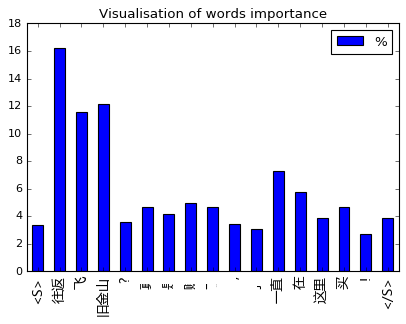

In [16]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

我的家乡惠州越来越热，选一款喜欢的墨镜很重要


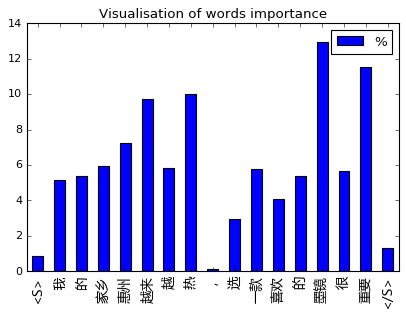

In [17]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要')

In [18]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '我的家乡惠州越来越热')

[ 0.8272717] 1


array([ 0.8272717], dtype=float32)

In [19]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.80729651] 1


array([ 0.80729651], dtype=float32)

In [20]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.81224251] 1


array([ 0.81224251], dtype=float32)

In [21]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.82809627] 1


array([ 0.82809627], dtype=float32)

我的家乡越来越热，选一款喜欢的墨镜很重要


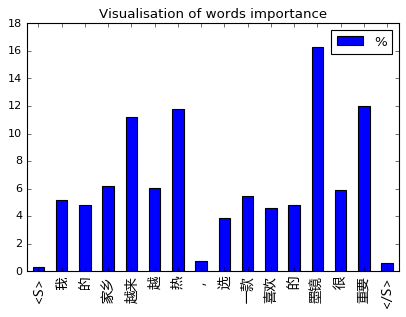

In [22]:
predict('我的家乡越来越热，选一款喜欢的墨镜很重要')

选一款喜欢的墨镜很重要，我的家乡越来越热


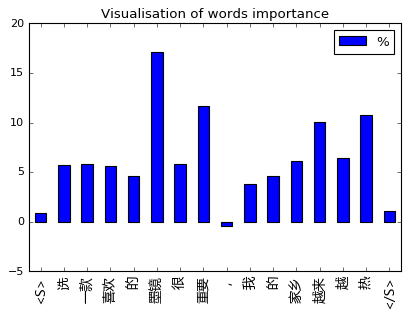

In [23]:
predict('选一款喜欢的墨镜很重要，我的家乡越来越热')

选一款喜欢的墨镜很重要


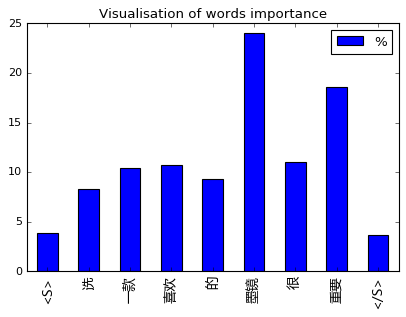

In [24]:
predict('选一款喜欢的墨镜很重要')

不要住酒店，这里的民宿好


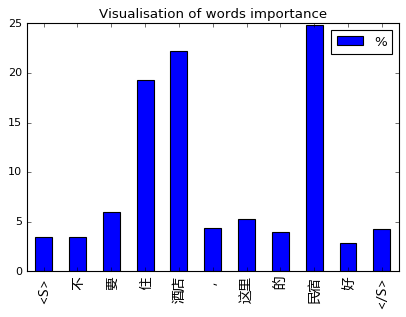

不要住民宿，这里的酒店好


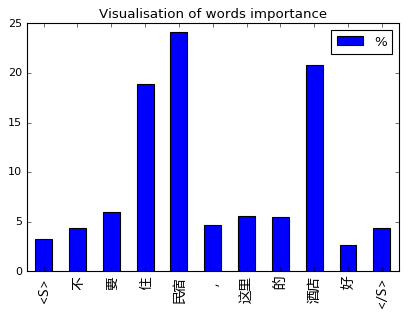

In [25]:
predict('不要住酒店，这里的民宿好')
predict('不要住民宿，这里的酒店好')

In [26]:
top_words('酒店')

酒店:1.000000 格雷斯:0.623905 布草:0.622604 情侣:0.585411 宾馆:0.578173 地毯:0.556503 布置:0.554325 会场:0.549273 喜来登:0.546280 七彩堂:0.544335 民宿:0.542178 水疗:0.540295 面馆:0.535319 会所:0.534333 旅馆:0.524261 厨房:0.521243 办公:0.519123 装修:0.518339 场地:0.516791 菜:0.516753 1700:0.516466 开张:0.516459 评价:0.512161 浪漫:0.511524 餐厅:0.510710 婚庆:0.509857 海底:0.509593 红专:0.509258 四合院:0.507029 enjoy:0.506417 婚礼:0.505551 科勒:0.505237 五环:0.504719 食堂:0.503126 小蓝:0.501881 间:0.500681 自营:0.500634 用品:0.500282 ktv:0.499380 桑拿:0.497010 度假:0.496005 古兰:0.495901 泳池:0.495221 饭店:0.494710 客房:0.493325 嘉宝:0.493004 院子:0.492639 大阪:0.492543 极小:0.491404 同里:0.491192 携程:0.491026 广田:0.491002 马桶:0.487923 别墅:0.487730 玩偶:0.487687 迪斯尼:0.487119 寄卖:0.487080 住:0.486073 池:0.485933 月子:0.485499 游泳:0.484354 多伦多:0.483898 院:0.483697 公寓:0.482195 炊具:0.481412 婚宴:0.481169 会议:0.480583 窗帘:0.480329 摊位:0.479829 保洁:0.479753 迪信:0.478194 春游:0.478098 金翔:0.478068 阳春:0.477795 设计:0.477755 3800:0.477447 体育:0.476644 平谷:0.475550 家具:0.475425 酒吧:0.475162 山顶:0.474986 米亚:0.474959 三大:0.47

In [27]:
top_words('新加坡')

新加坡:1.000000 service:0.556650 富力:0.498352 lan:0.495394 新山:0.492785 121:0.489168 旧金山:0.488267 香港:0.483982 左邻:0.475603 蒂:0.471673 旅游:0.469077 海景:0.468999 来自:0.468855 ka:0.467830 移民:0.463536 移居:0.460107 长岛:0.458897 澳洲:0.455887 置业:0.453561 迪拜:0.451627 正序:0.450636 107:0.449148 华侨:0.446652 南沙:0.445660 那里:0.444795 欧洲:0.443924 联展:0.443439 7900:0.441830 美国:0.440932 三期:0.440824 1900:0.440321 7200:0.440055 遨游:0.439190 马来西亚:0.437880 57:0.437673 73:0.437056 enomatic:0.435697 西昌:0.435019 富鑫:0.434247 国航:0.434035 l1:0.433064 汇福:0.432738 航空:0.432562 悦榕:0.431078 梅州:0.430664 社:0.430481 首尔:0.430204 天宸:0.428839 穷游:0.427721 湖边:0.427612 雅诗阁:0.427543 各国:0.426554 p50:0.426128 压铸:0.425996 清迈:0.425878 上城:0.425871 仙草:0.425611 蜜柚:0.425101 买票:0.423494 五国:0.423161 嘉汇:0.421773 彩票:0.421369 渔人:0.419409 湾:0.417921 湄公:0.417887 兵器:0.417796 多次:0.416867 c1:0.416310 丽景湾:0.416144 大阪:0.415529 自贸区:0.415147 〔:0.414774 金科:0.413875 欧元:0.413812 10t:0.413651 专列:0.412432 原著:0.411783 升值:0.411593 看房:0.411384 挪威:0.411056 中青旅:0.410299 蚌埠

In [28]:
top_words('民宿')

民宿:1.000000 旅馆:0.575486 海底:0.563612 酒店:0.542178 房产:0.519257 水杉:0.516443 大鹏:0.514049 涿州:0.507835 客栈:0.500962 承建:0.500177 窗帘:0.499426 楼盘:0.498629 景观:0.496684 宾馆:0.496258 订房:0.493779 歇:0.491883 泳池:0.491181 别墅:0.490648 公寓:0.490352 住:0.488849 独栋:0.486282 城堡:0.484319 风景:0.483880 正序:0.483519 精装:0.481578 乐园:0.479683 看房:0.478713 装潢:0.477036 墅:0.475648 游乐:0.475116 峨眉:0.473962 和风:0.473650 格雷斯:0.473156 星际:0.472988 平谷:0.472839 金翔:0.472698 豪宅:0.471456 五环:0.470349 堵车:0.470273 渲染:0.470216 现实:0.468769 度假:0.467473 九寨沟:0.467074 宝安:0.466694 跳:0.465831 毛坯:0.464420 康体:0.463880 套房:0.463364 租房:0.463073 竟能:0.462764 繁殖:0.462748 白鹭:0.461166 雨棚:0.461054 新都:0.460056 装修:0.459568 江华:0.459460 和美:0.458878 墙纸:0.458487 冰雪:0.458006 龙亭:0.457795 床:0.457506 济州:0.456887 汗蒸:0.456663 通风:0.456054 院子:0.455237 房:0.454177 装出:0.454041 广田:0.453726 小狗:0.453434 尾盘:0.452410 宴:0.452245 隔断:0.451919 大阪:0.451641 翻新:0.451509 旅游:0.451295 梅州:0.450698 spa:0.450685 嬉水:0.450249 饰:0.449835 双飞:0.449817 收买:0.449419 美人鱼:0.448951 绿地:0.448436 风情:0.448

In [29]:
top_words('酒店')

酒店:1.000000 格雷斯:0.623905 布草:0.622604 情侣:0.585411 宾馆:0.578173 地毯:0.556503 布置:0.554325 会场:0.549273 喜来登:0.546280 七彩堂:0.544335 民宿:0.542178 水疗:0.540295 面馆:0.535319 会所:0.534333 旅馆:0.524261 厨房:0.521243 办公:0.519123 装修:0.518339 场地:0.516791 菜:0.516753 1700:0.516466 开张:0.516459 评价:0.512161 浪漫:0.511524 餐厅:0.510710 婚庆:0.509857 海底:0.509593 红专:0.509258 四合院:0.507029 enjoy:0.506417 婚礼:0.505551 科勒:0.505237 五环:0.504719 食堂:0.503126 小蓝:0.501881 间:0.500681 自营:0.500634 用品:0.500282 ktv:0.499380 桑拿:0.497010 度假:0.496005 古兰:0.495901 泳池:0.495221 饭店:0.494710 客房:0.493325 嘉宝:0.493004 院子:0.492639 大阪:0.492543 极小:0.491404 同里:0.491192 携程:0.491026 广田:0.491002 马桶:0.487923 别墅:0.487730 玩偶:0.487687 迪斯尼:0.487119 寄卖:0.487080 住:0.486073 池:0.485933 月子:0.485499 游泳:0.484354 多伦多:0.483898 院:0.483697 公寓:0.482195 炊具:0.481412 婚宴:0.481169 会议:0.480583 窗帘:0.480329 摊位:0.479829 保洁:0.479753 迪信:0.478194 春游:0.478098 金翔:0.478068 阳春:0.477795 设计:0.477755 3800:0.477447 体育:0.476644 平谷:0.475550 家具:0.475425 酒吧:0.475162 山顶:0.474986 米亚:0.474959 三大:0.47

In [30]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

墨镜:0.583441 惠州:0.512884 波形:0.492721 护肤:0.485121 涂塑:0.484364 康达:0.483954 卷扬机:0.478548 人防:0.475362 膜:0.472432 台球:0.471845 迷人:0.469406 组件:0.465833 织带:0.465792 围网:0.465473 电控:0.465090 落水:0.464346 收银机:0.463623 pe管:0.463604 金蝶:0.463144 首先:0.463015 给水:0.462355 the:0.462079 pet:0.461253 入手:0.460689 粉底:0.460437 围栏:0.459808 美籍:0.459222 喷嘴:0.458281 木盒:0.458150 薄膜:0.458135 车载:0.457969 越来:0.457257 管材:0.456881 导电:0.456253 路灯:0.455832 冷却:0.455641 优品:0.455303 专科:0.455077 写真:0.454604 胶带:0.454246 211:0.453579 磁棒:0.452801 卧:0.452490 送友:0.452001 街机:0.451674 车棚:0.451401 香水:0.451117 电偶:0.450772 宾馆:0.450683 结实:0.450552 grg:0.450210 床垫:0.450197 唔:0.450118 衣柜:0.449996 xy:0.449833 滑梯:0.449777 晾:0.449607 吉他:0.449515 写字:0.449285 定位:0.448586 开水:0.447747 首饰:0.447456 节奏:0.447193 烘箱:0.446805 古风:0.446204 卷帘:0.446076 七星:0.445973 储罐:0.444658 镀:0.444281 冷弯:0.444236 科勒:0.444185 裕兴:0.443788 袋:0.443727 土工:0.441805 商标:0.441774 bmw:0.441662 通风:0.441347 窗帘:0.441257 尽情:0.441081 oem:0.441014 酚醛:0.440954 热:0.440828 宏利:0.440607 邦泰

In [31]:
top_words('选一款喜欢的墨镜很重要')

墨镜:0.700646 重要:0.520431 古风:0.481843 上身:0.478790 尤其:0.475346 一款:0.474470 黄皮:0.473659 ugg:0.470157 衣柜:0.468569 茶叶:0.467976 将至:0.465711 帅气:0.462223 夹克:0.459639 西裤:0.459450 运动:0.459378 音质:0.459239 送友:0.459201 入手:0.458179 轻便:0.456874 奶瓶:0.452755 鞋:0.452663 皮鞋:0.452515 松软:0.452108 手提:0.451885 皮尔兹:0.451770 斗拱:0.451122 粉底:0.450308 穿出:0.449641 皮靴:0.449601 498:0.448284 淡:0.447321 绵羊:0.447115 衣服:0.445395 台球:0.445082 绒裤:0.444668 吉他:0.444638 免考:0.442499 送亲:0.440518 首饰:0.438372 科凡:0.437303 开水:0.436813 护肤:0.436060 打球:0.435552 落水:0.435265 组件:0.435249 这时候:0.434580 西服:0.433266 手表:0.432323 红木:0.432202 loho:0.431794 文人:0.431756 减肥:0.431717 麻将:0.431647 好运:0.431548 乐坛:0.431450 1212:0.431218 feel:0.431017 搜罗:0.429974 牙齿:0.429938 喜欢:0.429663 结实:0.428999 大衣:0.428881 档次:0.428868 衬托:0.428666 好学:0.427996 药水:0.427973 包包:0.427912 桌:0.427458 衬衫:0.427189 美体:0.427026 潮:0.426351 pet:0.426018 眼:0.426017 296:0.426010 地气:0.426010 xy:0.425581 清爽:0.425286 涂塑:0.424685 型男:0.424493 腕表:0.423001 开关:0.422529 窗帘:0.422350 按摩:0.4216

In [32]:
top_words('nike')

nike:1.000000 耐克:0.646266 dw:0.508791 清障:0.501313 平行:0.498858 正品:0.494570 club:0.493978 绅宝:0.489019 旅游:0.484592 跑步:0.484252 金杯:0.482354 用车:0.480740 耐卡:0.476450 王开:0.471646 游艇:0.470412 徕卡:0.470005 威固:0.468284 gox:0.467791 com:0.464727 air:0.464604 benro:0.461742 龙粤:0.461023 旅行:0.460533 华人:0.460316 游览:0.458251 色差:0.457661 一千多:0.457339 健步:0.456479 包车:0.455452 五十铃:0.455330 专卖:0.455051 租车:0.453865 东丽:0.452806 奔驰:0.451999 围网:0.451991 专柜:0.451882 专修:0.451808 风神:0.451208 房车:0.450872 toyota:0.449328 机芯:0.447759 仁恒:0.447582 大巴:0.446724 海康威视:0.446482 绿地:0.446423 海狮:0.446333 游游:0.445296 振雄:0.445130 余氯:0.443864 停车:0.443784 車:0.441868 上汽:0.441831 百诺:0.441716 奥迪:0.441167 藝:0.440942 斑马:0.440276 打球:0.440210 包天:0.440117 4s店:0.439683 安通:0.439558 沃森:0.439438 汽配:0.438842 出海:0.438046 中汽:0.437560 童车:0.437477 柯斯达:0.436967 巢:0.436866 母线:0.436773 婚庆:0.436742 推车:0.436289 卫星:0.436288 四轮:0.436119 燎原:0.436066 g10:0.435932 ︱:0.435549 折叠:0.435212 吴氏:0.435076 零担:0.434770 美合:0.434093 party:0.433915 粤港:0.433777 v80:0.43

In [33]:
top_words('耐克')

耐克:1.000000 nike:0.646266 阿迪:0.567394 专柜:0.528478 名表:0.525850 邓禄普:0.509866 三双:0.507949 169:0.497346 婚庆:0.496800 清障:0.492662 送友:0.482960 专营:0.476492 正品:0.476267 婚宴:0.475019 悠哉:0.474293 送亲:0.473991 圣诞:0.473781 三叶:0.473383 ugg:0.472997 零食:0.470408 奔驰:0.464247 特产:0.463939 鞋:0.462583 车棚:0.460736 旅游:0.460684 金面:0.459981 296:0.459495 会议:0.457524 百多:0.457398 奢侈:0.456261 gox:0.455977 膜:0.455063 双肩:0.455062 手表:0.453522 凉亭:0.453226 旅行:0.452879 策划:0.452647 白菜:0.451273 鞋子:0.450829 碧桃:0.449619 到货:0.448349 婚礼:0.447269 房车:0.446598 阅:0.446594 再买:0.444774 水池:0.444714 字画:0.443742 音箱:0.442888 买到:0.442151 跑鞋:0.440876 金粤:0.440188 大牌:0.439449 围栏:0.439371 威尔:0.439275 专卖:0.439041 年货:0.438114 围网:0.437655 骏马:0.437152 dw:0.435489 停车:0.434909 健步:0.434537 用车:0.434488 抓起:0.434133 箱柜:0.433762 奖杯:0.433200 玉柴:0.432991 较好:0.432807 场馆:0.431835 呼叫:0.431398 首饰:0.431377 松软:0.431357 蝶阀:0.431288 二胡:0.430862 拉杆:0.430854 房贷:0.430622 便器:0.430130 4750:0.429932 摊位:0.429471 将至:0.429388 tcl:0.428944 外景:0.428854 情人:0.428674 包车:0.4283

In [34]:
top_words('重演')

重演:1.000000 色调:0.852052 斜纹:0.644840 得体:0.637259 时尚:0.623442 棕色:0.622084 金丝绒:0.603266 抽象:0.599956 gxg:0.593418 大波:0.592809 裙裤:0.590775 高领:0.588592 每季:0.581045 提花:0.580004 三味:0.576386 五中:0.576042 款式:0.575199 翻领:0.574888 礼帽:0.571545 高傲:0.571467 柄:0.569149 媤:0.566217 毛线:0.565151 新款:0.562061 shopping:0.560988 绸:0.559547 soiree:0.557099 小方:0.555428 定做:0.555059 三人:0.554866 呢子:0.553788 通勤:0.553237 jolin:0.552513 碎花:0.549172 梭:0.548658 考究:0.548377 aj:0.548086 搅:0.546646 开叉:0.546536 缝制:0.546167 清货:0.545516 水域:0.544867 感性:0.543983 两会:0.543917 颊:0.543491 甜美:0.541727 极简:0.541426 魅力:0.541362 媞:0.541279 格子:0.540996 裁衣:0.538434 出彩:0.537305 唇妆:0.537074 两面:0.536998 修剪:0.535473 原单:0.534636 春夏:0.534251 金典:0.533856 系带:0.530007 圆头:0.528108 越岭:0.526580 塑性:0.526219 穿出:0.526085 冰丝:0.525312 利落:0.525059 福泰欣:0.524156 wowo:0.524050 版纳:0.524017 轻盈:0.523531 席子:0.522981 绒裤:0.521501 小气:0.520874 套件:0.519908 条纹:0.519903 羚羊:0.519565 面料:0.519343 避暑:0.518640 艾力:0.518419 镂空:0.517279 遵:0.516872 杰西:0.515503 丝光:0.514820 折扣:0.5

In [35]:
top_words('电视')

电视:1.000000 kuset:0.632036 液晶:0.630739 彩电:0.570828 创奇:0.530945 拆机:0.523986 拼接:0.514389 广播:0.510939 视:0.508062 待命:0.504387 屏:0.503077 高金:0.502960 did:0.501606 tvc:0.499180 寰:0.499020 步频:0.498948 储值:0.491326 显示:0.487829 华强北:0.485219 富通:0.484229 可视:0.483807 斯斐德:0.483735 昮:0.483046 天线:0.482187 转椅:0.481754 兆信:0.481407 丹佛:0.480954 影视:0.480706 tv:0.479755 wdp:0.477095 赛鸽:0.476240 广告:0.475255 投影:0.474270 蒙古:0.472484 天笔:0.469328 if:0.465400 艺考:0.464304 形势:0.463713 dtsx:0.461032 神威:0.460775 维修:0.460747 灏:0.459545 土石方:0.458075 触手:0.456515 蒙娜丽莎:0.455631 佳信:0.454034 ehs:0.452426 滴胶:0.452299 led:0.452132 好再来:0.451259 m1:0.451039 中星:0.450200 德兰:0.449717 米时:0.449194 喷泉:0.449034 电信:0.448963 根宝:0.448780 海翔:0.448518 旗云:0.448222 lg:0.448153 开眼:0.447624 博雅:0.447188 全彩:0.446643 英墨:0.445524 oracle:0.445180 hdr:0.444496 视听:0.443898 u盘:0.443518 菲尼特:0.442316 旷世:0.441764 尊爵:0.441227 racol:0.441082 江民:0.440421 剧:0.439768 奥委会:0.439704 沙画:0.438281 浩宇:0.437766 珞珈:0.437547 媒体:0.437158 布展:0.436906 深化:0.436896 吊绳:0.436

In [36]:
top_words('墨镜')

墨镜:1.000000 轻便:0.499580 开车:0.493836 手提:0.489756 pet:0.487212 音质:0.486324 黄皮:0.485801 泼水:0.484673 粉底:0.481775 减肥:0.476657 适配:0.471806 皮尔兹:0.471252 皮靴:0.470600 开关:0.469236 开水:0.469173 钛:0.465995 古风:0.464871 治脱发:0.461887 桶:0.459784 追:0.456582 副:0.456256 衬托:0.455628 卧:0.455442 摔:0.453517 车型:0.453047 送友:0.452509 运动:0.452251 组件:0.450603 卸妆:0.449109 这时候:0.446501 药水:0.446154 西裤:0.445753 便器:0.445321 走路:0.444937 按摩:0.444899 茶叶:0.444434 搭讪:0.443821 哇:0.443314 档次:0.442847 塑形:0.442631 薄膜:0.442535 毫安:0.441848 垃圾:0.441247 护肤:0.439616 充电:0.438729 龙海:0.438430 穿出:0.438389 夏娃:0.437263 台球:0.437109 泡妞:0.436988 将至:0.436251 暴跌:0.436098 狗粮:0.435784 珍惜:0.434967 瞳:0.434801 绝望:0.434584 放量:0.434147 太空:0.433958 色斑:0.432927 器:0.432604 电偶:0.432383 ugg:0.432372 鹤:0.432031 闭门:0.431564 机芯:0.431264 刀锋:0.431115 代步:0.431031 loho:0.430605 绞股蓝:0.430453 康达:0.429813 衣柜:0.429479 余款:0.429433 眼:0.429422 木瓜:0.429226 尤其:0.429176 麦迪:0.428953 打球:0.428548 烟熏:0.427639 数显:0.427216 送亲:0.426741 揭:0.425687 偏光:0.425446 帅:0.425346 众一:0.4250